In [66]:
# load packages
import torch
import pandas
from datasets import Dataset
import matplotlib as plt
from sklearn.manifold import TSNE

In [144]:
# load distance matrix from file
distance_matrix = torch.load("../data/distance_matrix")
# transform distance matrix to 2-dimensional distance matrix
distance_matrix_embedded = TSNE(n_components=2, # number of desired dimensions
                                learning_rate='auto',
                                n_iter=5000, # number of iterations default is 1000
                                early_exaggeration=16.0, # default is 12.0
                                init='random',
                                perplexity=297 # perplexity is related to the number of neighbours
                                ).fit_transform(distance_matrix)

In [58]:
# load distance matrix ids
distance_matrix_ids = torch.load("../data/distance_matrix_ids")

In [37]:
# get shape of transformed matrix
distance_matrix_embedded.shape

(7908, 2)

In [35]:
# print embedded distance matrix
distance_matrix_embedded

array([[ -19.122   ,  -15.534377],
       [ -15.776139,  -76.300476],
       [  -8.955099, -101.21797 ],
       ...,
       [ -11.104919,   15.802686],
       [  46.123592,  -36.95889 ],
       [  87.810165,   42.528385]], dtype=float32)

In [145]:
# turn matrix into pandas data frame
df = pandas.DataFrame(distance_matrix_embedded, columns=['x','y'])

In [146]:
# add ids to data frame
df['id'] = distance_matrix_ids

In [67]:
# load video data
videos = Dataset.load_from_disk("../data/videos")

In [147]:
# add channel to data frame
df['channel'] = videos['channel']

In [148]:
# get colors for channel
colors = []
for d in df['channel']:
    if d == 'Al-Jazeera-English':
        colors.append('orange')
    if d == 'BBC-News':
        colors.append('red')
    if d == 'CCTV-Video-News-Agency':
        colors.append('black')
    if d == 'CNN-News':
        colors.append('purple')
    if d == 'DW-News':
        colors.append('blue')
    if d == 'Fox-News':
        colors.append('darkgreen')
# add them to the data frame
df['colors'] = colors

In [142]:
df

,x,y,id,channel,colors
0,-0.437689,-2.315839,28,Al-Jazeera-English,orange
1,5.766316,-6.136607,29,Al-Jazeera-English,orange
2,5.101436,-5.610465,88,Al-Jazeera-English,orange
3,-3.896728,-0.340510,89,Al-Jazeera-English,orange
4,-6.353350,-3.492468,179,Al-Jazeera-English,orange
...,...,...,...,...,...
7903,5.716575,5.461619,228295,Fox-News,darkgreen
7904,3.217053,4.316925,228296,Fox-News,darkgreen
7905,-2.234865,-0.342474,228297,Fox-News,darkgreen
7906,4.630151,2.318562,228298,Fox-News,darkgreen


<Axes: xlabel='x', ylabel='y'>

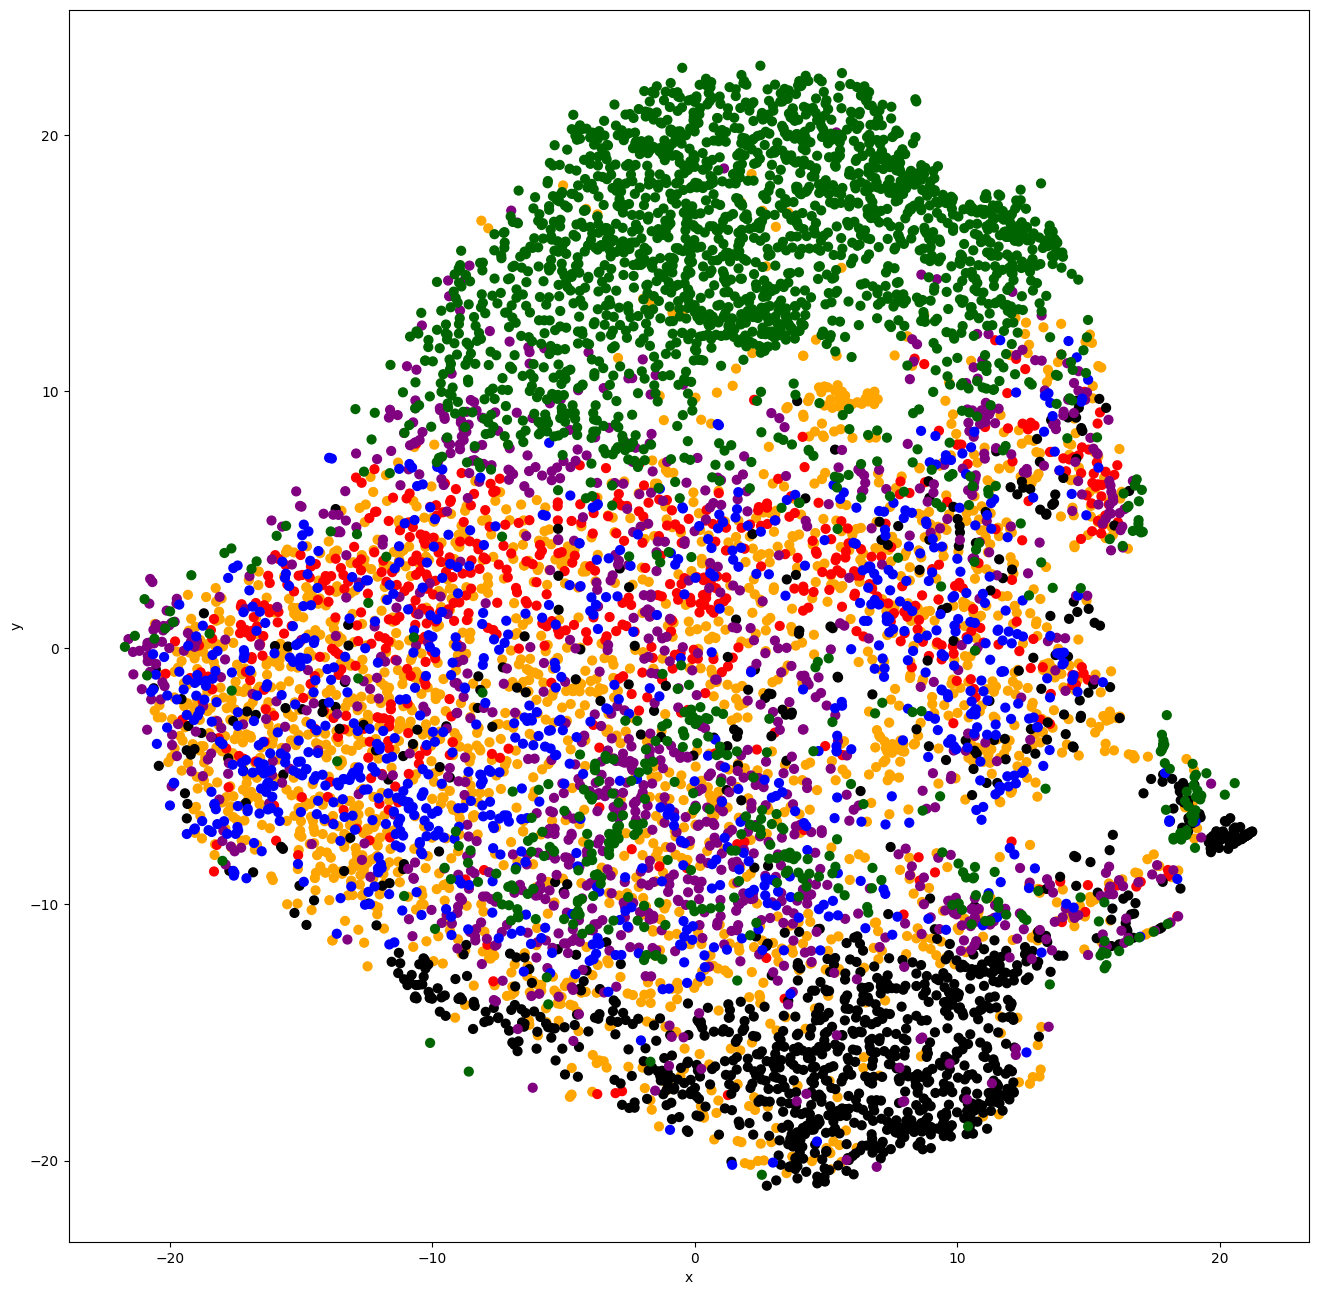

In [149]:
# scatter plot 2-d distance matrix colored by channel
df.plot.scatter(x='x', y='y', s=40, c=colors, figsize=(16,16))